A basic interface for PYTHIA.

[PYTHIA](http://home.thep.lu.se/~torbjorn/pythia83html/Welcome.html) is a general-purpose event generator for high-energy particle collisions.

Importing CXX.jl

In [2]:
using Cxx
using Libdl

Importing shared library and header file

In [4]:
const path_to_lib = pwd()
addHeaderDir(path_to_lib, kind=C_System)
Libdl.dlopen(path_to_lib * "/Pythiaexperiment.so", Libdl.RTLD_GLOBAL)
cxxinclude(path_to_lib * "/src/Pythiaexperiment.h")

Creating class object

* ```out_event_file``` *Pythia event list file*
* ```is_final_event = false ```  *All events are considered*
* ```is_charged_event = false ```  *Charged and no charged events are considered*

In [5]:
is_final_event = false
is_charged_event = false
out_event_file = "my_out_csv.csv"
pythia = @cxxnew PythiaExperiment(pointer(out_event_file),is_final_event,is_charged_event)

(class PythiaExperiment *) @0x000055ac44aedea0


Pythia example: main02 ( [view Pythia examples](http://home.thep.lu.se/~torbjorn/pythia83html/Welcome.html) 
and [Pythia documentation](http://home.thep.lu.se/~torbjorn/pythia83html/Welcome.html) )
* Beam: p + anti-p
* Energy (CM) 1960 GeV
* WeakSingleBoson: f + anti-f ⇾ γ + Z<sup>0</sup>
* Minimum invariant mass 80 GeV
* Maximum invariant mass 120 GeV

In [6]:
@cxx pythia->readString(pointer("Main:numberOfEvents = 1000"))
@cxx pythia->readString(pointer("Beams:idB = -2212"))
@cxx pythia->readString(pointer("Beams:eCM = 1960."))
@cxx pythia->readString(pointer("WeakSingleBoson:ffbar2gmZ = on"))
@cxx pythia->readString(pointer("PhaseSpace:mHatMin = 80."))
@cxx pythia->readString(pointer("PhaseSpace:mHatMax = 120."))

Added parameter: Main:numberOfEvents = 1000
Added parameter: Beams:idB = -2212
Added parameter: Beams:eCM = 1960.
Added parameter: WeakSingleBoson:ffbar2gmZ = on
Added parameter: PhaseSpace:mHatMin = 80.
Added parameter: PhaseSpace:mHatMax = 120.


Pythia parameters list

Function arguments:

* **macro** : List of parameters

* **histogram** : List of histograms

In [7]:
@cxx pythia -> listElement(pointer("macro")) # macro -> pythia parameters

Macro instructions
[1] Main:numberOfEvents = 1000
[2] Beams:idB = -2212
[3] Beams:eCM = 1960.
[4] WeakSingleBoson:ffbar2gmZ = on
[5] PhaseSpace:mHatMin = 80.
[6] PhaseSpace:mHatMax = 120.


Data histogram

Function arguments:

* **Data:**
    * **p<sub>x</sub>** : p<sub>x</sub> four-momentum component (GeV/c).
    
	* **p<sub>y</sub>** : p<sub>y</sub> four-momentum component (GeV/c).
    
    * **p<sub>z</sub>** : p<sub>z</sub> four-momentum component (GeV/c).
    
    * **e** : e four-momentum component (GeV).
    
	* **xProd** : x production vertex coordinate (mm).
    
    * **yProd** : y production vertex coordinate (mm).
    
    * **zProd** : z production vertex coordinate (mm).
	
	* **tProd** : t production vertex coordinate (mm/c).
    
	* **pT** : transverse momentum (GeV/c).
    
    * **pT2** : square transverse momentum (GeV/c)<sup>2</sup>.
    
	* **eT** : transverse energy (GeV).
    
    * **eT2** : square transverse energy (GeV)<sup>2</sup>.
	
	* **y** : rapidity.
    
    * **eta** : pseudorapidity.

	* **theta** : polar azimuthal angle.
    
    * **phi** : azimuthal angle.
	
	* **mT** : transverse mass (GeV).
    
    * **mT2** : squared transverse mass (GeV)<sup>2</sup>.

* PDG particle codes. [Online list](http://pdg.lbl.gov/2014/reviews/rpp2014-rev-monte-carlo-numbering.pdf)

Short summary of the most common pdg ([PYTHIA Worksheet](http://home.thep.lu.se/~torbjorn/pdfdoc/worksheet8200.pdf) page 17)

![PDG list](./img/pdg_list.png)



In [8]:
@cxx pythia->addHist(pointer("pT"),23) # Z^0 transverse momentum

Added histogram: Data pT, particle 23


Run pythia

In [9]:
histograms = @cxx pythia->runExperiment();  


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.303      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change:  1 Sep 2020  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 04 nov 2020 at 16:47:21    |  | 
 |  |                                                                              |  | 
 |  |   Christian Bi

In [35]:
histograms # vector list

(class std::vector<class std::vector<double, class std::allocator<double> >, class std::allocator<class std::vector<double, class std::allocator<double> > > >) {
}


Get the data

In [22]:
histogramList = []
for h in histograms
    my_histo = []
    for d in h
        push!(my_histo,collect(d))
    end
    push!(histogramList,my_histo)
end

In [23]:
@cxx pythia -> listElement(pointer("histogram"))

Histogram list
[1] data: pT pdg: 23


Plotting the histograms.

In [24]:
using Plots
pyplot()

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273


Plots.PyPlotBackend()

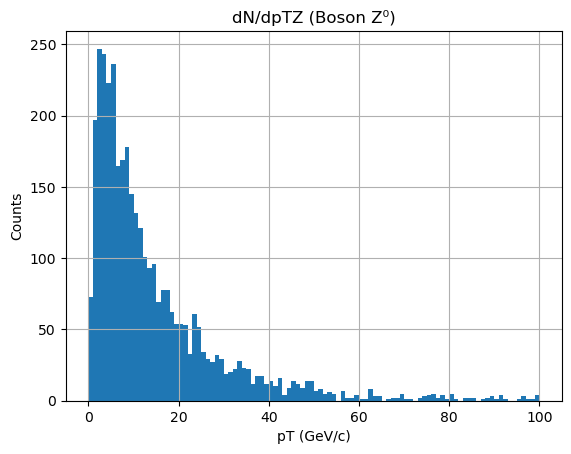

PyObject Text(24.000000000000007, 0.5, 'Counts')

In [26]:
PyPlot.hist(histogramList[1],100,[0,100]);
PyPlot.title("dN/dpTZ (Boson Z⁰)")
PyPlot.grid("on")
PyPlot.xlabel("pT (GeV/c)")
PyPlot.ylabel("Counts")

Event list CSV file.

In [31]:
using CSV, DataFrames

In [32]:
df = CSV.read("my_out_csv.csv");

In [33]:
names(df)

15-element Array{String,1}:
 "event"    
 "id"       
 "particle" 
 "status"   
 "mother1"  
 "mother2"  
 "daughter1"
 "daughter2"
 "colour"   
 "acolour"  
 "px"       
 "py"       
 "pz"       
 "e"        
 "m"        

In [34]:
show(df[1:6,:], allcols=true)

6×15 DataFrame
│ Row │ event │ id    │ particle │ status │ mother1 │ mother2 │ daughter1 │
│     │ Int64 │ Int64 │ String   │ Int64  │ Int64   │ Int64   │ Int64     │
├─────┼───────┼───────┼──────────┼────────┼─────────┼─────────┼───────────┤
│ 1   │ 0     │ 90    │ (system) │ -11    │ 0       │ 0       │ 0         │
│ 2   │ 1     │ 2212  │ (p+)     │ -12    │ 0       │ 0       │ 204       │
│ 3   │ 2     │ -2212 │ (pbar-)  │ -12    │ 0       │ 0       │ 205       │
│ 4   │ 3     │ 2     │ (u)      │ -21    │ 6       │ 0       │ 5         │
│ 5   │ 4     │ -2    │ (ubar)   │ -21    │ 7       │ 7       │ 5         │
│ 6   │ 5     │ 23    │ (Z0)     │ -22    │ 3       │ 4       │ 8         │

│ Row │ daughter2 │ colour │ acolour │ px      │ py      │ pz      │ e       │
│     │ Int64     │ Int64  │ Int64   │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼───────────┼────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 0         │ 0      │ 0       │ 0.0     │ 0.0     │ 0.0 